In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from time_series_gpt.models.Monte_Carlo.prophet import ProphetMeta
from data_loading_finance.loading_data import LoadingData
from ts_tools.tools import tools

[*********************100%%**********************]  1 of 1 completed

Getting info for ticker BTC-USD...


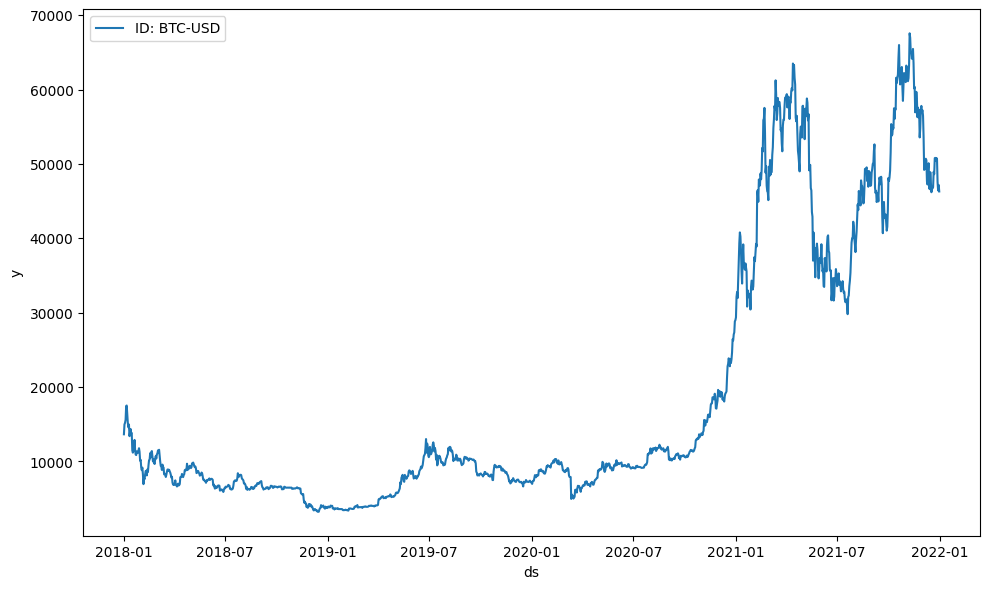

,unique_id,ds,y
0,BTC-USD,2021-12-31,46306.445312
1,BTC-USD,2021-12-30,47178.125000
2,BTC-USD,2021-12-29,46444.710938
3,BTC-USD,2021-12-28,47588.855469
4,BTC-USD,2021-12-27,50640.417969
...,...,...,...
1456,BTC-USD,2018-01-05,17429.500000
1457,BTC-USD,2018-01-04,15599.200195
1458,BTC-USD,2018-01-03,15201.000000
1459,BTC-USD,2018-01-02,14982.099609


In [21]:
# Load the data
tickers = ['BTC-USD']
loader = LoadingData(tickers=tickers)
ts = loader.get_data(start_date='2018-01-01', end_date='2022-01-01')
info = loader.get_info_ticker()

ts_tools = tools()
ts = ts_tools.ts_prepartion(ts, 'Date', 'Adj Close')
ts_tools.plot_ts(ts)
ts

In [30]:
prophet = False

horizon= 30
freq= 'D'

model = ProphetMeta (ts_data=ts)
model.train_and_evaluate()
ts_forecast = model.predict(horizon=horizon, freq=freq)
result_metric = model.get_results()

Processing BTC-USD...


11:21:08 - cmdstanpy - INFO - Chain [1] start processing
11:21:09 - cmdstanpy - INFO - Chain [1] done processing
11:21:09 - cmdstanpy - INFO - Chain [1] start processing
11:21:10 - cmdstanpy - INFO - Chain [1] start processing
11:21:10 - cmdstanpy - INFO - Chain [1] start processing
11:21:10 - cmdstanpy - INFO - Chain [1] start processing
11:21:10 - cmdstanpy - INFO - Chain [1] start processing
11:21:10 - cmdstanpy - INFO - Chain [1] start processing
11:21:10 - cmdstanpy - INFO - Chain [1] start processing
11:21:10 - cmdstanpy - INFO - Chain [1] done processing
11:21:10 - cmdstanpy - INFO - Chain [1] start processing
11:21:10 - cmdstanpy - INFO - Chain [1] done processing
11:21:10 - cmdstanpy - INFO - Chain [1] done processing
11:21:10 - cmdstanpy - INFO - Chain [1] done processing
11:21:10 - cmdstanpy - INFO - Chain [1] done processing
11:21:10 - cmdstanpy - INFO - Chain [1] done processing
11:21:10 - cmdstanpy - INFO - Chain [1] done processing
11:21:10 - cmdstanpy - INFO - Chain [1]

Finished processing BTC-USD.


/Users/marcosherediapimienta/Desktop/GitHub/GenerativeAI_TimeSeries/GenerativeAI_TimeSeries-1/time_series_gpt/models/Monte_Carlo/prophet.py:118: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ts_forecast = pd.concat([ts_forecast, forecast[['unique_id','ds', 'yhat', 'yhat_lower', 'yhat_upper']]])
/Users/marcosherediapimienta/Desktop/GitHub/GenerativeAI_TimeSeries/GenerativeAI_TimeSeries-1/time_series_gpt/models/Monte_Carlo/prophet.py:129: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ts_results = 

In [31]:
ts_forecast

,unique_id,ds,yhat,yhat_lower,yhat_upper
0,BTC-USD,2018-01-01,14545.493875,12225.270647,17181.879679
1,BTC-USD,2018-01-02,15605.493519,12880.591813,18275.672246
2,BTC-USD,2018-01-03,15711.138273,12985.069569,18317.312736
3,BTC-USD,2018-01-04,15652.325351,12975.096713,18198.673833
4,BTC-USD,2018-01-05,15719.764646,13130.853104,18211.214454
...,...,...,...,...,...
1486,BTC-USD,2022-01-26,48194.126555,44834.862159,51652.254996
1487,BTC-USD,2022-01-27,48067.772705,44440.147617,51704.909933
1488,BTC-USD,2022-01-28,48157.246113,44327.947807,52043.583033
1489,BTC-USD,2022-01-29,48219.770579,44829.706343,51812.516260


In [32]:
result_metric

,unique_id,SMAPE Error,MAPE Error,Accuracy
0,BTC-USD,0.691101,0.536528,30.889924


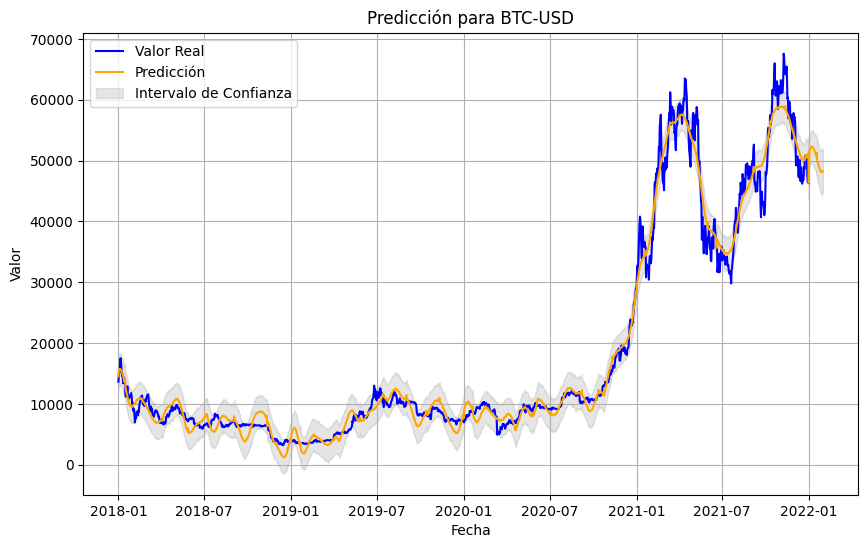

In [40]:
# Función para graficar el pronóstico junto con los valores reales
def plot_forecast(ts_data, ts_forecast):
    unique_ids = ts_forecast['unique_id'].unique()
    
    for unique_id in unique_ids:
        forecast_data = ts_forecast[ts_forecast['unique_id'] == unique_id]
        actual_data = ts_data[ts_data['unique_id'] == unique_id]
        
        plt.figure(figsize=(10, 6))
        
        # Graficar los valores reales
        plt.plot(actual_data['ds'], actual_data['y'], label='Valor Real', color='blue')
        
        # Graficar las predicciones
        plt.plot(forecast_data['ds'], forecast_data['yhat'], label='Predicción', color='orange')
        
        # Rellenar el intervalo de confianza
        plt.fill_between(forecast_data['ds'], forecast_data['yhat_lower'], forecast_data['yhat_upper'], 
                         color='gray', alpha=0.2, label='Intervalo de Confianza')
        
        plt.title(f'Predicción para {unique_id}')
        plt.xlabel('Fecha')
        plt.ylabel('Valor')
        plt.legend()
        plt.grid(True)
        plt.show()
        
plot_forecast(ts, ts_forecast)